In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,AdaBoostRegressor,StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
# Objective: Train a machinelearning model on a housing Dataset using ensamble learning techniques:Bagging,Boosting,and Sticking.

# Download Housing Dataset (Example: California Housing Sataset)
from sklearn.datasets import fetch_california_housing

In [ ]:
# Load Dataset
california=fetch_california_housing()
df=pd.DataFrame(california.data,columns=california.feature_names)
df['Target']=california.target

In [ ]:
# Display basic info
df.info()
print("\nFirst 5 rows:\n",df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB

First 5 rows:
    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.

In [ ]:
# Selecting numerical features and target
x=df[['MedInc','HouseAge','AveRooms','AveOccup']].dropna()
y=df['Target']

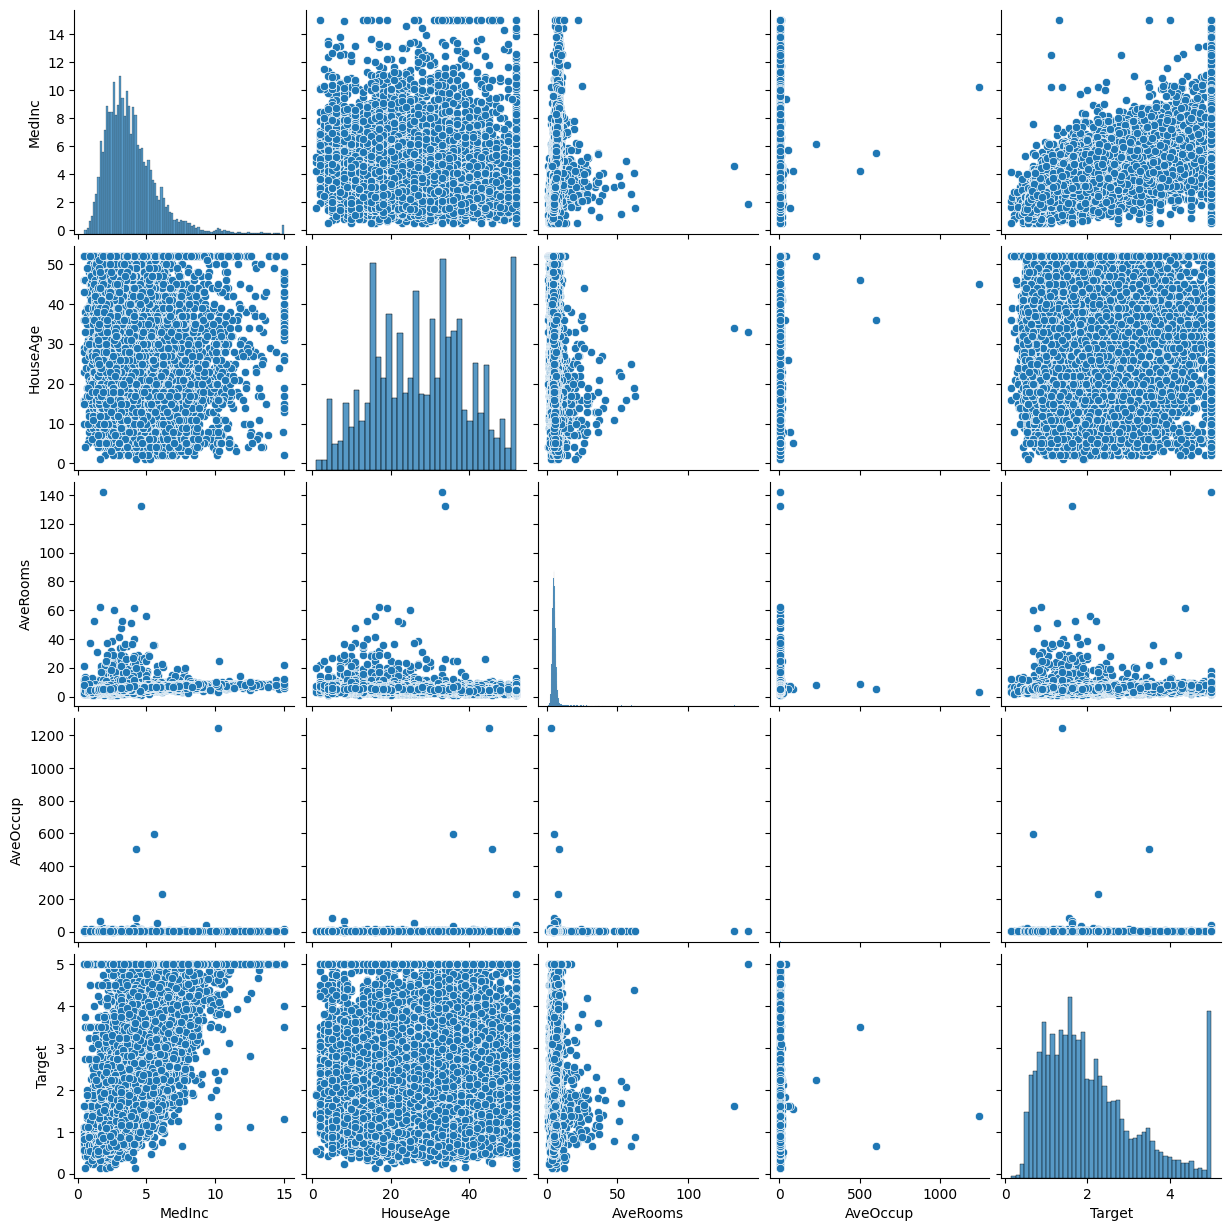

In [ ]:
# Exploratory Data Analysis (EDA)
sns.pairplot(df[['MedInc','HouseAge','AveRooms','AveOccup','Target']])
plt.show()

In [ ]:
# Splitting Data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
# Standardize features
scaler= StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [ ]:
# Apply PCA for Dimensionality Reduction
pca=PCA(n_components=2)
x_train_pca=pca.fit_transform(x_train)
x_test_pca=pca.transform(x_test)

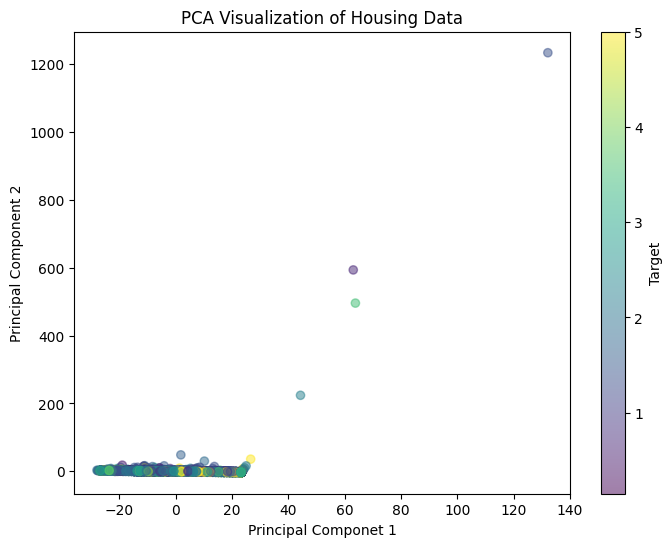

In [ ]:
# PCA Viaualization
plt.figure(figsize=(8,6))
plt.scatter(x_train_pca[:,0],x_train_pca[:,1],c=y_train,cmap='viridis',alpha=0.5)
plt.colorbar(label='Target')
plt.xlabel('Principal Componet 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Housing Data')
plt.show()

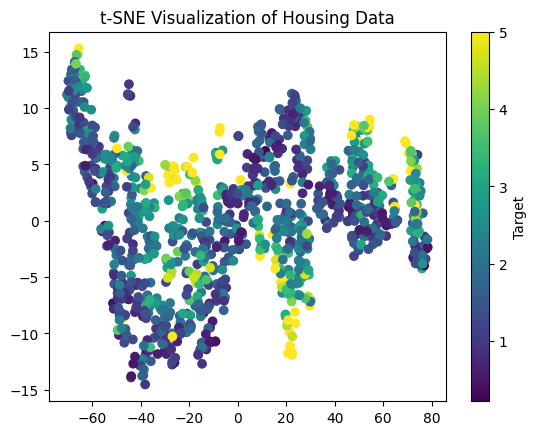

In [ ]:
# Apply t-SNE for visualization
sample_size=1000 # Reduce data for t-SNE to avoid computation overload
x_sample,y_sample=x_train[:sample_size],y_train[:sample_size]
tsne=TSNE(n_components=2,random_state=42)
x_train_tsne=tsne.fit_transform(x_sample)
plt.scatter(x_train_tsne[:,0],x_train_tsne[:,1],c=y_sample,cmap='viridis')
plt.colorbar(label='Target')
plt.title('t-SNE Visualization of Housing Data')
plt.show()

In [ ]:
# Train Ensemble Models
bagging_model=BaggingRegressor(estimator=DecisionTreeRegressor(),n_estimators=100.random_state=42)
bagging_model.fit(x_train_pca,y_train)

booting_model=AdaBoostRegressor(estimator=DecisionTreeRegressor(),n_estimators=100,random_state=42)
booting_model.fit(x_train_pca,y_train)

stacking_model=StackingRegressor(
    estimators=[('dt',DecisionTreeRegressor()),('rf',RandomForestRegressor())],
    final_estimator=LinearRegression()
)
stacking_model.fit(x_train_pca,y_train)

StackingRegressor(estimators=[('dt', DecisionTreeRegressor()),
                              ('rf', RandomForestRegressor())],
                  final_estimator=LinearRegression())